In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

from tensorflow.keras.datasets import mnist

from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

print('')
print('x_train.shape = ', x_train.shape, ', t_train.shape = ', t_train.shape)
print('x_test.shape = ', x_test.shape, ', t_test.shape = ', t_test.shape)


x_train.shape =  (60000, 28, 28) , t_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28) , t_test.shape =  (10000,)


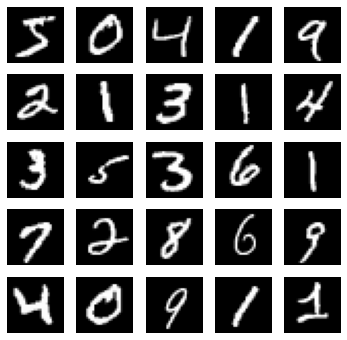

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 6))

for index in range(25):

  plt.subplot(5, 5, index + 1)
  plt.imshow(x_train[index], cmap = 'gray')
  plt.axis('off')

plt.show()

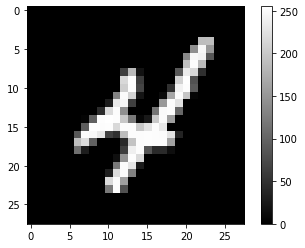

In [4]:
plt.imshow(x_train[9], cmap = 'gray')
plt.colorbar()
plt.show()

# 정규화

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print('train max = ', x_train[0].max(), 'train min = ', x_train[0].min())
print('test_max = ', x_test[0].max(), 'test min = ', x_test[0].min)

train max =  1.0 train min =  0.0
test_max =  1.0 test min =  <built-in method min of numpy.ndarray object at 0x7f96c368c690>


# One-hot encoding

In [6]:
t_train = to_categorical(t_train, 10)
t_test = to_categorical(t_test, 10)

print('train label = ', t_train[0], ', decimal value = ', np.argmax(t_train[0]))
print('test label = ', t_test[0], ', decimal value = ', np.argmax(t_test[0]))

train label =  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] , decimal value =  5
test label =  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] , decimal value =  7


# Model

In [7]:
model = Sequential()

model.add(Flatten(input_shape = (28, 28, 1)))

model.add(Dense(100, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

In [8]:
from tensorflow.keras.optimizers import SGD

model.compile(loss = 'categorical_crossentropy', optimizer = SGD(), metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist = model.fit(x_train, t_train, epochs = 30, validation_split = 0.2)

Epoch 1/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7289 - accuracy: 0.8186 - val_loss: 0.3835 - val_accuracy: 0.8958
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3663 - accuracy: 0.8981 - val_loss: 0.3130 - val_accuracy: 0.9136
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3133 - accuracy: 0.9120 - val_loss: 0.2785 - val_accuracy: 0.9229
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.9202 - val_loss: 0.2585 - val_accuracy: 0.9290
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2604 - accuracy: 0.9266 - val_loss: 0.2403 - val_accuracy: 0.9328
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2428 - accuracy: 0.9316 - val_loss: 0.2274 - val_accuracy: 0.9368
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2274 - accuracy: 0.9361 - val_loss: 0.2146 - val_accuracy:

In [10]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1113 - accuracy: 0.9688


[0.11125437170267105, 0.9688000082969666]

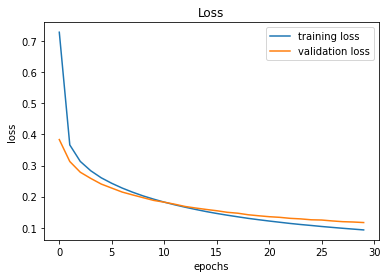

In [11]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(hist.history['loss'], label = 'training loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')
plt.legend(loc = 'best')

plt.show()

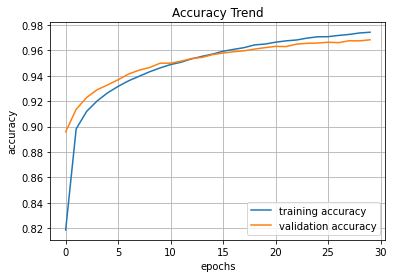

In [12]:
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label = 'training accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation accuracy')

plt.legend(loc = 'best')
plt.show()